In [17]:
import pandas as pd              #importare la libreria pandas

In [18]:
df=pd.read_csv('C:\\Users\\scimm\\OneDrive\\Desktop\\esame python\\covid_dati_esame.csv')        #importare il file con i dati

1) Verificare le dimensioni del dataset

In [19]:
dimensioni_dataset=df.shape

print("Il dataset ha "+ str(dimensioni_dataset[0]) +" righe e " +str(dimensioni_dataset[1]) +" colonne.")


Il dataset ha 429435 righe e 67 colonne.


2) Verificare i metadati

In [20]:
df.info()         #Indice, nome delle colonne, conteggio di valori non nulli, tipo di dato presente nella colonna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

3) Numero di casi per continente:
   Facendo un groupby si ottengono cifre assurde. Il numero dei casi in "cases" è aggiornato alla data relativa, pertanto non si possono semplicemente sommare perché si andrebbero a conteggiare più volte gli stessi casi.
   Bisogna quindi andare a cercare il dato in "total_case" alla data più recente per ogni continente.
   

In [21]:
continenti=df['continent'].unique().tolist()     #Lista dei valori unici in "continenti"
print(continenti)


['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America', 'South America']


In [97]:
unique_locations = df['location'].unique()
print("Valori unici nella colonna 'location':", unique_locations)


Valori unici nella colonna 'location': ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Europe' 'European Union (27)' 'Faroe Islands' 'Falkland Islands' 'Fiji'


In [22]:
df.head(10) #per dare un occhio a come è fatto il df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-11,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-14,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [23]:

df_2 = df.copy() #creare una "copia esplicita" del df per lavorarci senza fare cambiamenti a quello originale

df_2['date']=pd.to_datetime(df_2['date']) #convertire i valori in "date" in formato data

df_2=df_2.dropna(subset=['continent', 'date','total_cases'])    #Togliere righe con valori nulli

ultima_data_per_continente = df_2.groupby('continent')['date'].max()   #Data più recente per ogni continente

print(ultima_data_per_continente)

continent
Africa          2024-08-04
Asia            2024-08-04
Europe          2024-08-04
North America   2024-08-04
Oceania         2024-08-04
South America   2024-08-04
Name: date, dtype: datetime64[ns]


L'ultima data per ogni continente con dati presenti è il 4 Agosto 2024.
Ora bisogna associare continente-data-n. casi per avere quelli totali reali


In [24]:
df_ultimi_casi = pd.merge(df_2, ultima_data_per_continente, on=['continent', 'date'], how='inner')

totali_per_continente = df_ultimi_casi.groupby('continent')['total_cases'].sum()

In [25]:
print(totali_per_continente)

continent
Africa            13145380.0
Asia             301499099.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64


4) Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne 
confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali 
nel mondo (calcolati anche sulle locazioni senza indicazione di continent);

In [26]:
df_3 = df.copy() #creare una "copia esplicita" del df per lavorarci senza fare cambiamenti a quello originale

df_3['date']=pd.to_datetime(df_3['date']) #convertire i valori in "date" in formato data

df_3=df_3.dropna(subset=['date','total_cases'])    #Togliere righe con valori nulli

df_3['continent'] = df_3['continent'].fillna('others') #riempire i valori vuoti in "continent"


In [34]:
others_ultima_data = df_3[df_3['continent'] == 'others']['date'].max()
others_data_at_max_date = df_3[(df_3['continent'] == 'others') & (df_3['date'] == others_ultima_data)] # Filtra il DataFrame per 'others' e per la data più recente

total_cases_others = others_data_at_max_date['total_cases'].sum()   # Calcola il totale dei casi totali per 'others' alla data più recente
print(total_cases_others)

2512252454.0


In [35]:
casi_mondiali=totali_per_continente.sum()+total_cases_others   # somma dei valori totali per i cinque continenti più gli "others"
print(casi_mondiali)

3288119237.0


In [38]:
others_locations = df_3[df_3['continent'] == 'others']['location'].unique()    # si tratta in realtà di zone che appartengono comunque a un continente, perciò non inserirò il totale trovato per "others" nelle prossime richieste
print(others_locations)

['Africa' 'Asia' 'Europe' 'European Union (27)' 'High-income countries'
 'Low-income countries' 'Lower-middle-income countries' 'North America'
 'Oceania' 'South America' 'Upper-middle-income countries' 'World']


In [80]:
mondo_ultima_data = df_3[df_3['location'] == 'World']['date'].max()         #provo a confrontare la somma all'ultima data dei cinque continenti con il valore di "World", sempre all'ultima data

mondo_casi_ultima_data = df_3[(df_3['location'] == 'World') & (df_3['date'] == max_date)]['total_cases'].sum()

casi_mondiali_2=totali_per_continente.sum()

if mondo_casi_ultima_data==casi_mondiali_2:
    print ("I risultati sono uguali e i casi totali ammontano a " +str(casi_mondiali_2)+" non vanno aggiunte altre zone")
else:
    print("Hai sbagliato tutto, vai a dormire")

I risultati sono uguali e i casi totali ammontano a 775866783.0 non vanno aggiunte altre zone


In [74]:
a1="North America"    # Dati due continenti, confrontare:
b2="Africa"


In [75]:

# numero massimo di casi nei due continenti
max_cases_riccastri = df_3[df_3['continent'] == a1]['total_cases'].max()     # Il numero massimo di casi
max_cases_poveracci = df_3[df_3['continent'] == b2]['total_cases'].max()

df_4 = df.copy()  # Data più vecchia per ciascun continente
df_4['date'] = pd.to_datetime(df_4['date'])
df_4 = df_4.dropna(subset=['continent', 'date', 'total_cases'])
prima_data_per_continente = df_4.groupby('continent')['date'].min()
print(prima_data_per_continente)

# media giornaliera dei casi totali
media_riccastri = max_cases_riccastri / n_giorni_rilevamento_continente if n_giorni_rilevamento_continente > 0 else 0
media_poveracci = max_cases_poveracci / n_giorni_rilevamento_continente if n_giorni_rilevamento_continente > 0 else 0

# percentuali dei due continenti rispetto ai casi totali mondiali
percentuale_riccastri = (max_cases_riccastri / casi_mondiali_2) * 100 if casi_mondiali > 0 else 0
percentuale_poveracci = (max_cases_poveracci / casi_mondiali_2) * 100 if casi_mondiali > 0 else 0

continent
Africa          2020-01-05
Asia            2020-01-05
Europe          2020-01-05
North America   2020-01-05
Oceania         2020-01-05
South America   2020-01-05
Name: date, dtype: datetime64[ns]


In [76]:
africa_data = df_4[df_4['continent'] == 'Africa']  #appurato che date iniziali e finali di rilavamento dei continenti sono uguali, ne prendo uno a caso per contare i giorni
min_date_africa = africa_data['date'].min()
max_date_africa = africa_data['date'].max()
n_giorni_rilevamento_continente = (max_date_africa - min_date_africa).days + 1


In [81]:
# stampa a video i risultati dei confronti su valore massimo, media e percentuale sul totale

#max
if max_cases_riccastri > max_cases_poveracci:
    print(a1+ " ha un valore più alto di casi totali di Covid 19 rispetto a " +b2)
elif max_cases_riccastri < max_cases_poveracci:
    print(b2+ " ha un valore più alto di casi totali di Covid 19 rispetto a "+a1)
else:
    print("I valori di casi totali di Covid 19 tra "+a1+" e "+b2+" sono uguali")

#media
print(f"La media giornaliera di casi di COVID-19 per {a1} è: {media_riccastri:.2f}")
print(f"La media giornaliera di casi di COVID-19 per {b2} è: {media_poveracci:.2f}")

if media_riccastri > media_poveracci:
    print(f"La media giornaliera di {a1} è più alta di quella di {b2}.")
elif media_riccastri < media_poveracci:
    print(f"La media giornaliera di {b2} è più alta di quella di {a1}.")
else:
    print(f"Le medie giornaliere di {a1} e {b2} sono uguali.")

#percentuale
print(f"La percentuale di {a1} rispetto ai casi mondiali è: {percentuale_riccastri:.2f}%")
print(f"La percentuale di {b2} rispetto ai casi mondiali è: {percentuale_poveracci:.2f}%")

North America ha un valore più alto di casi totali di Covid 19 rispetto a Africa
La media giornaliera di casi di COVID-19 per North America è: 61790.22
La media giornaliera di casi di COVID-19 per Africa è: 2432.95
La media giornaliera di North America è più alta di quella di Africa.
La percentuale di North America rispetto ai casi mondiali è: 13.33%
La percentuale di Africa rispetto ai casi mondiali è: 0.52%


5) Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla 
data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci 
sono similarità con l'andamento del numero dei casi totali;

In [29]:
import matplotlib.pyplot as plt

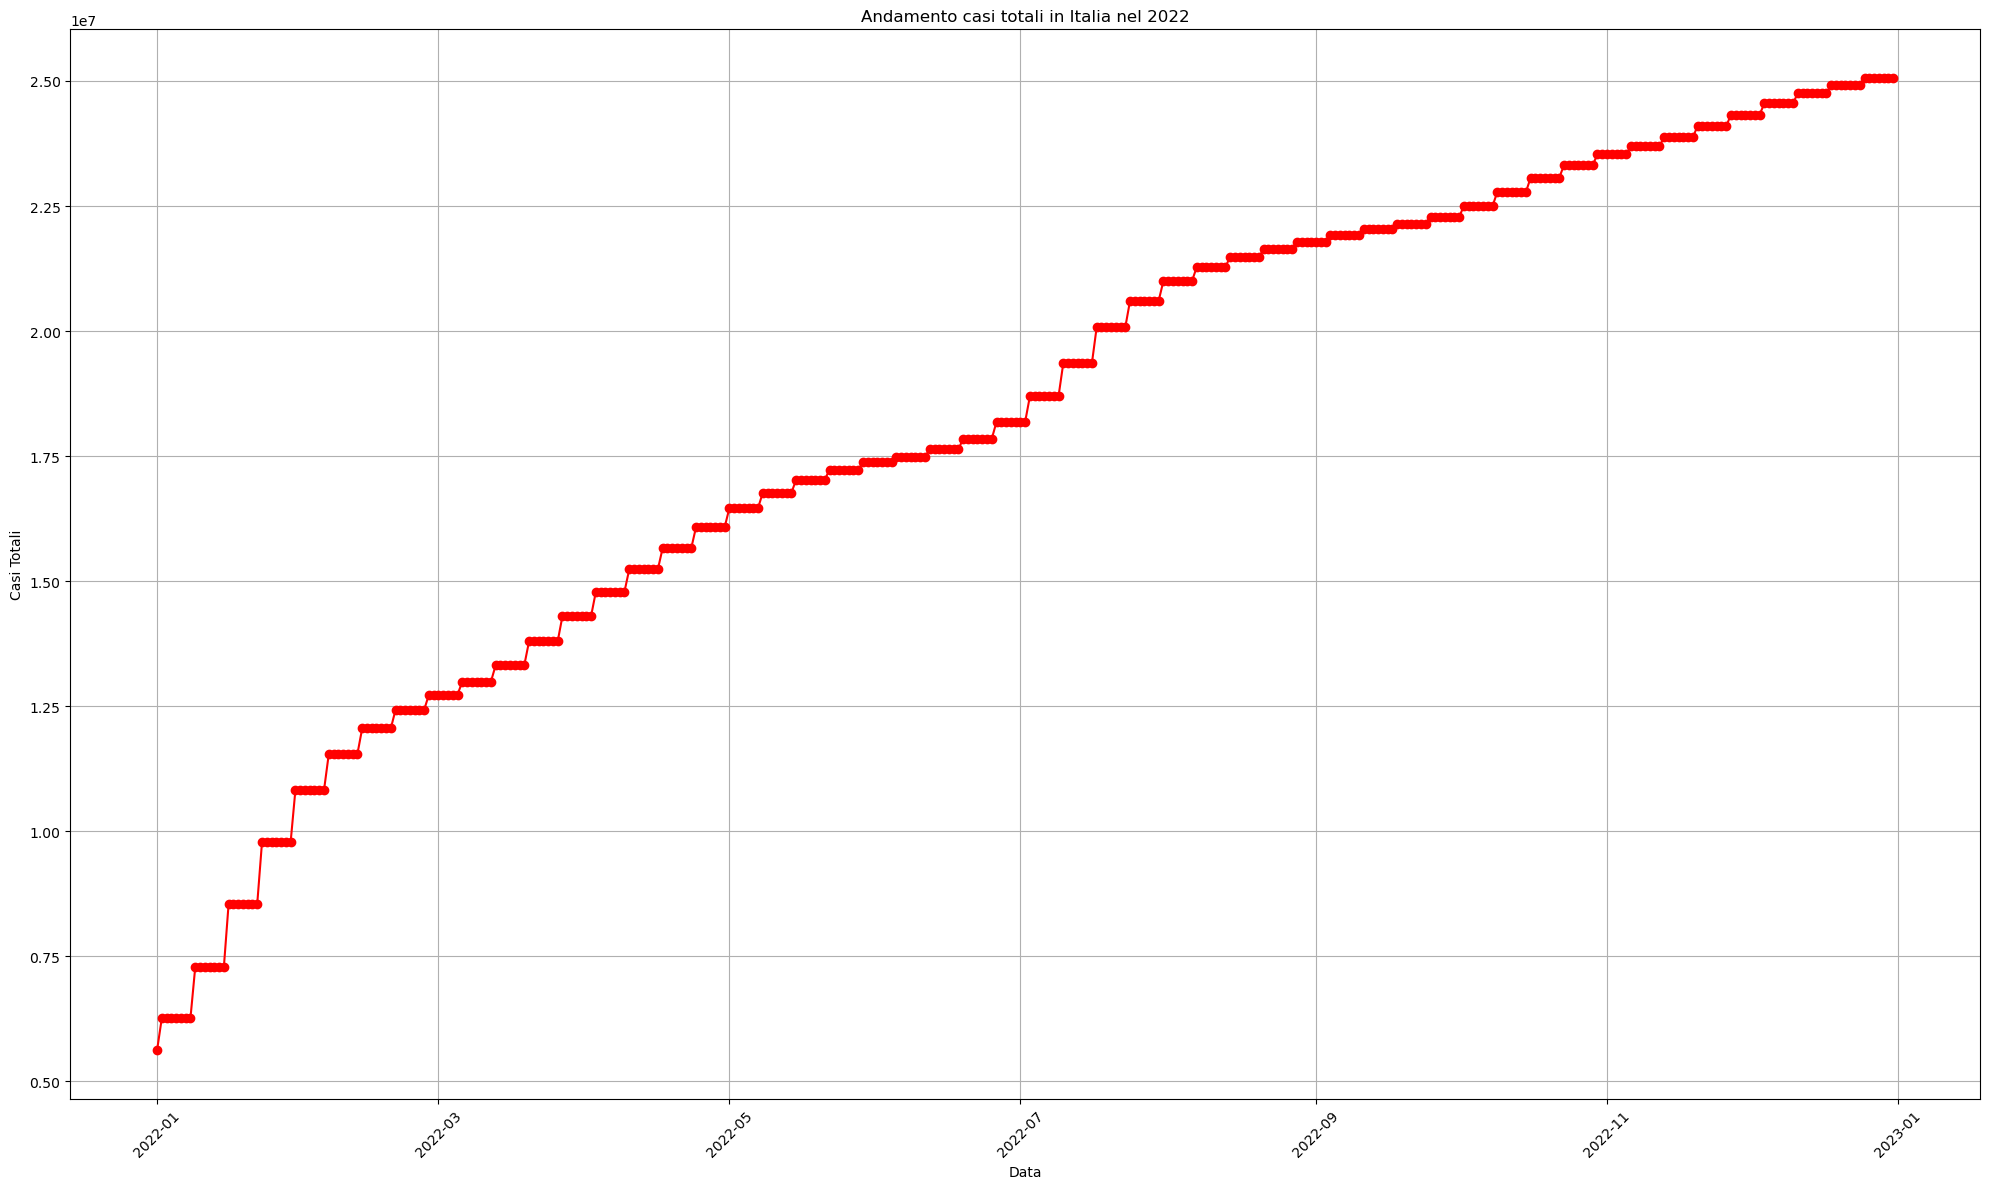

In [91]:
df_ita = df.copy()  # Creare una "copia esplicita" del df per lavorarci senza fare cambiamenti a quello originale

df_ita['date'] = df_ita['date'].astype(str) #trasformare colonna data in stringa

Italia_2022 = df_ita[(df_ita['location'] == 'Italy') & (df_ita['date'].str.startswith('2022'))]   #filtro per Italia/2022
Italia_2022 = Italia_2022.dropna(subset=['date', 'total_cases'])

Italia_2022.loc[:, 'date'] = pd.to_datetime(Italia_2022.loc[:, 'date'])  # conversione colonna data in formato data

#grafico casi totali rispetto alla data

plt.figure(figsize=(20, 12))
plt.plot(Italia_2022['date'], Italia_2022['total_cases'], marker='o', linestyle='-', color='red')
plt.title('Andamento casi totali in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

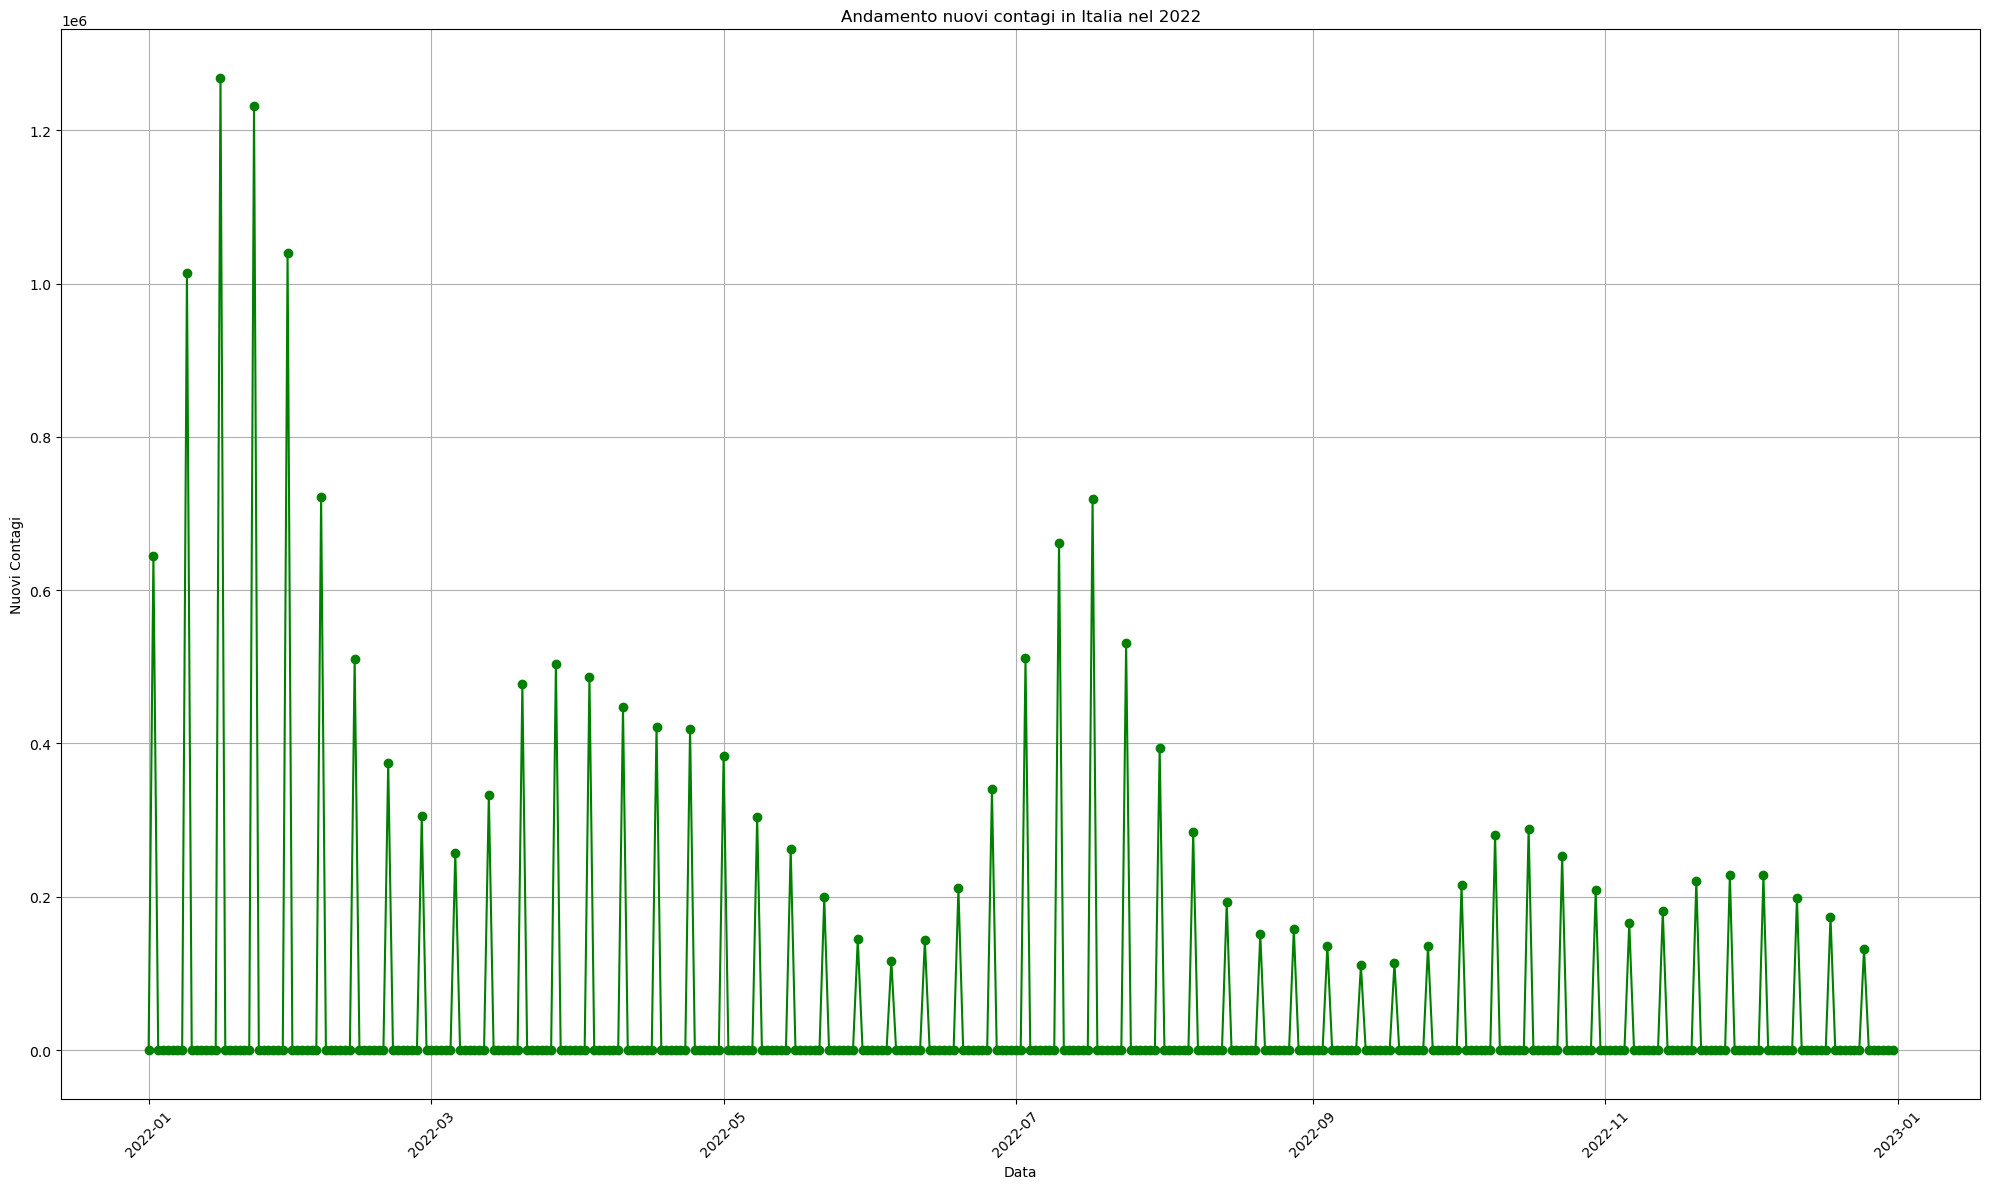

In [92]:
#grafico nuovi casi rispetto alla data

Italia_2022 = Italia_2022.dropna(subset=['new_cases'])

plt.figure(figsize=(20, 12))
plt.plot(Italia_2022['date'], Italia_2022['new_cases'], marker='o', linestyle='-', color='green')
plt.title('Andamento nuovi contagi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Contagi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5/2 Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

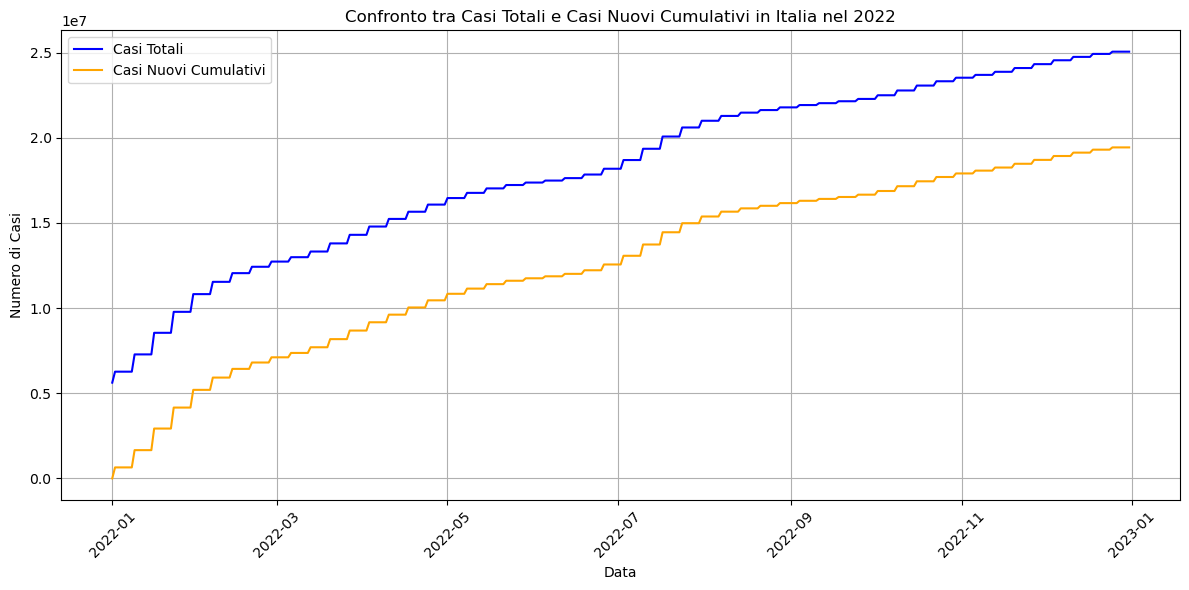

In [87]:
# Ordina i dati per data

Italia_2022 = Italia_2022.sort_values('date')

Italia_2022['cumulative_new_cases'] = Italia_2022['new_cases'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(Italia_2022['date'], Italia_2022['total_cases'], label='Casi Totali', color='blue')
plt.plot(Italia_2022['date'], Italia_2022['cumulative_new_cases'], label='Casi Nuovi Cumulativi', color='orange')
plt.title('Confronto tra Casi Totali e Casi Nuovi Cumulativi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Numero di Casi')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

COMMENTO: non è che ci sono similarità, è che è esattamente lo stesso grafico. Solo che casi totali parte da più in alto perché considera anche tutto il periodo precedente,
mentre la somma cumulativa di new cases comincia da zero alla data che abbiamo fissato noi.

In [ ]:
6) Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il 
numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e 
scrivere un breve commento a riguardo;

<Figure size 800x600 with 0 Axes>

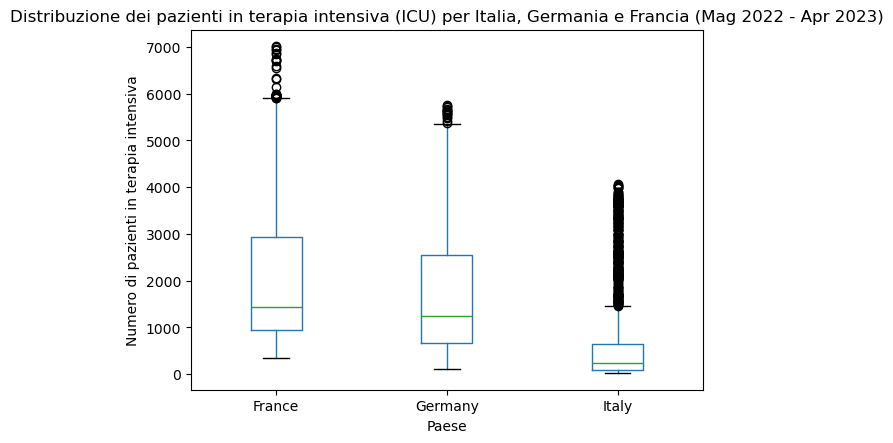

In [90]:
df_fragerit=df.copy()

# Filtro del df per i tre paesi
df_fragerit = df_fragerit[df_fragerit['location'].isin(['Italy', 'Germany', 'France'])]
df_fragerit = df_fragerit.dropna(subset=['date', 'icu_patients'])

# boxplot
plt.figure(figsize=(8,6))
df_fragerit.boxplot(column='icu_patients', by='location', grid=False)

plt.title('Distribuzione dei pazienti in terapia intensiva (ICU) per Italia, Germania e Francia (Mag 2022 - Apr 2023)')
plt.suptitle('')
plt.xlabel('Paese')
plt.ylabel('Numero di pazienti in terapia intensiva')
plt.show()



COMMENTO:L'italia ha avuto un numero inferiore di pazienti in terapia intensiva rispetto a Francia e Germania, ma più fluttuazioni.
La Germania si pone come il paese con meno valori anomali.
Ragionevolmente, la situazione italiana è stata provocata da una quantità insufficiente di posti in terapia intensiva.
Il fatto che la Francia abbia il valore minimo di ICU più alto, mi fa pensare che si sia mossa in ritardo.


7) Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per 
ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [101]:
df_hosp = df.copy()
df_hosp['date'] = pd.to_datetime(df_hosp['date'])
# Filtro per i tre paesi nel 2023, sulle sole colonne d'interesse
df_hosp = df_hosp[['location', 'date', 'hosp_patients']]
df_hosp = df_hosp[(df_hosp['location'].isin(['Italy', 'France', 'Spain','Germany'])) & (df_hosp['date'].dt.year == 2023)]

# Verifica della presenza di valori nulli sui pazienti ospedalizzati
null_values = df_hosp['hosp_patients'].isnull().any()

# df filtrato e se ci sono null
display(df_hosp)
print("Valori nulli nella colonna 'hosp_patients':", null_values)


,location,date,hosp_patients
131459,France,2023-01-01,24157.0
131460,France,2023-01-02,24075.0
131461,France,2023-01-03,23516.0
131462,France,2023-01-04,23167.0
131463,France,2023-01-05,22664.0
...,...,...,...
364038,Spain,2023-12-27,NaN
364039,Spain,2023-12-28,NaN
364040,Spain,2023-12-29,NaN
364041,Spain,2023-12-30,NaN


Valori nulli nella colonna 'hosp_patients': True


In [ ]:
df_hosp = df.copy()
df_hosp['date'] = pd.to_datetime(df_hosp['date'])
# Filtro per i tre paesi nel 2023, sulle sole colonne d'interesse
df_hosp = df_hosp[['location', 'date', 'hosp_patients']]
df_hosp = df_hosp[(df_hosp['location'].isin(['Italy', 'France', 'Spain','Germany'])) ]

# Verifica della presenza di valori nulli sui pazienti ospedalizzati
null_values = df_hosp['hosp_patients'].isnull().any()

# df filtrato e se ci sono null
print(df_hosp)
print("Valori nulli nella colonna 'hosp_patients':", null_values)

In [104]:
df_hosp = df.copy()
df_hosp['date'] = pd.to_datetime(df_hosp['date'])

# Filtro per i quattro paesi nel 2023, sulle sole colonne d'interesse
df_hosp = df_hosp[['location', 'date', 'hosp_patients']]
df_hosp = df_hosp[(df_hosp['location'].isin(['Italy', 'France', 'Spain', 'Germany'])) & (df_hosp['date'].dt.year == 2023)]

# Creazione di una colonna 'mese' per raggruppare i dati
df_hosp['month'] = df_hosp['date'].dt.to_period('M')

# Raggruppamento per paese e mese e calcolo della somma dei pazienti ospedalizzati
ospitalizz_mese = df_hosp.groupby(['location', 'month'])['hosp_patients'].sum()

# Visualizzazione del DataFrame raggruppato e della presenza di valori nulli
display(ospitalizz_mese)

location  month  
France    2023-01    603746.0
          2023-02    372800.0
          2023-03    406028.0
          2023-04         0.0
          2023-05         0.0
          2023-06         0.0
          2023-07         0.0
          2023-08         0.0
          2023-09         0.0
          2023-10         0.0
          2023-11         0.0
          2023-12         0.0
Germany   2023-01         0.0
          2023-02         0.0
          2023-03         0.0
          2023-04         0.0
          2023-05         0.0
          2023-06         0.0
          2023-07         0.0
          2023-08         0.0
          2023-09         0.0
          2023-10         0.0
          2023-11         0.0
          2023-12         0.0
Italy     2023-01    186524.0
          2023-02     99408.0
          2023-03     90356.0
          2023-04     84006.0
          2023-05     76011.0
          2023-06     39569.0
          2023-07     24404.0
          2023-08     34992.0
          2023-09     

In [ ]:
Commento: non sostituirei i valori nulli, i paesi (a parte l'italia) hanno smesso, a un certo punto, di comunicare i dati. Forse si potrebbe fare una media per la Spagna, estendendola ai sei mesi non coperti